In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [14]:
import urllib.request
import xarray as xr

ftp_url = "ftp://ftp.ifremer.fr/ifremer/dbcp-drifter/gdac/active/db_4101763.nc"
local_path = "db_4101763.nc"

# Download the file
urllib.request.urlretrieve(ftp_url, local_path)

# Open with Xarray
ds = xr.open_dataset(local_path)

In [15]:
ds

<xarray.Dataset>
Dimensions:               (TIME: 4625561, N_AIR: 1, N_WATER: 2, N_ENGINEERING: 1)
Coordinates:
  * TIME                  (TIME) datetime64[ns] 2019-03-05T08:00:00 ... 2020-...
  * N_AIR                 (N_AIR) float64 -0.5
  * N_WATER               (N_WATER) float64 0.5 15.0
  * N_ENGINEERING         (N_ENGINEERING) float64 0.0
Data variables: (12/51)
    TIME_QC               (TIME) float32 ...
    N_AIR_QC              (N_AIR) float32 ...
    N_WATER_QC            (N_WATER) float32 ...
    N_ENGINEERING_QC      (N_ENGINEERING) float32 ...
    LATITUDE              (TIME) float64 ...
    LONGITUDE             (TIME) float64 ...
    ...                    ...
    TEMP_HR_70_90         (TIME, N_WATER) float64 ...
    TEMP_HR_70_90_QC      (TIME, N_WATER) float32 ...
    TEMP_HR_SPOT          (TIME, N_WATER) float64 ...
    TEMP_HR_SPOT_QC       (TIME, N_WATER) float32 ...
    TIME_TO_FIRST_GPS     (TIME, N_ENGINEERING) float64 ...
    TIME_TO_FIRST_GPS_QC  (TIME, N_ENGINEERING) float32 ...
Attributes: (12/71)
    comment:                           
    conventions:                       Drifter Data Management 1.0
    country:                           EU
    date_creation:                     2021-09-13T10:53:15Z
    date_update:                       2025-01-17T12:48:53Z
    deployment_country:                EU
    ...                                ...
    wave_sensor_sampling_time_period:  
    wigos_identifier:                  
    wind_sensor_sampling_strategy:     
    wind_sensor_sampling_time_period:  
    wind_sensor_type:                  
    wmo_regions:

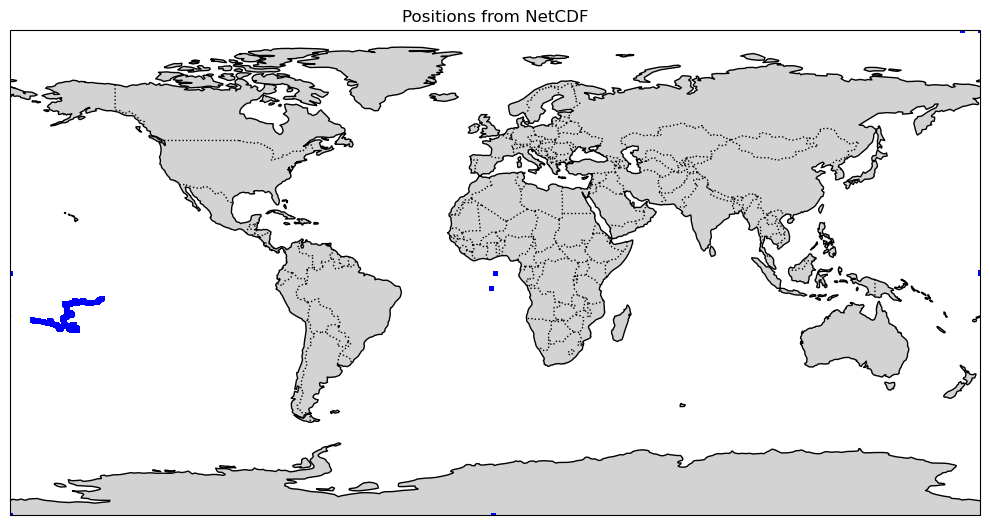

In [11]:
df = ds[['LATITUDE', 'LONGITUDE']].to_dataframe().dropna()

# Setup plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plot the points
ax.scatter(
    df['LONGITUDE'],
    df['LATITUDE'],
    s=5,
    color='blue',
    alpha=0.7,
    transform=ccrs.PlateCarree(),
    label='Observations'
)

# Set extent (optional, e.g., Pacific region)
# ax.set_extent([120, -60, -40, 40], crs=ccrs.PlateCarree())

plt.title('Positions from NetCDF')
plt.tight_layout()
plt.show()

In [5]:
# Select the first water column (N_WATER = 0.5)
temp_hr_spot_series = ds.TEMP_HR_SPOT.sel(N_WATER=0.5)
temp_series = ds.TEMP.sel(N_WATER=0.5)
temp_hr_series = ds.TEMP_HR.sel(N_WATER=0.5)

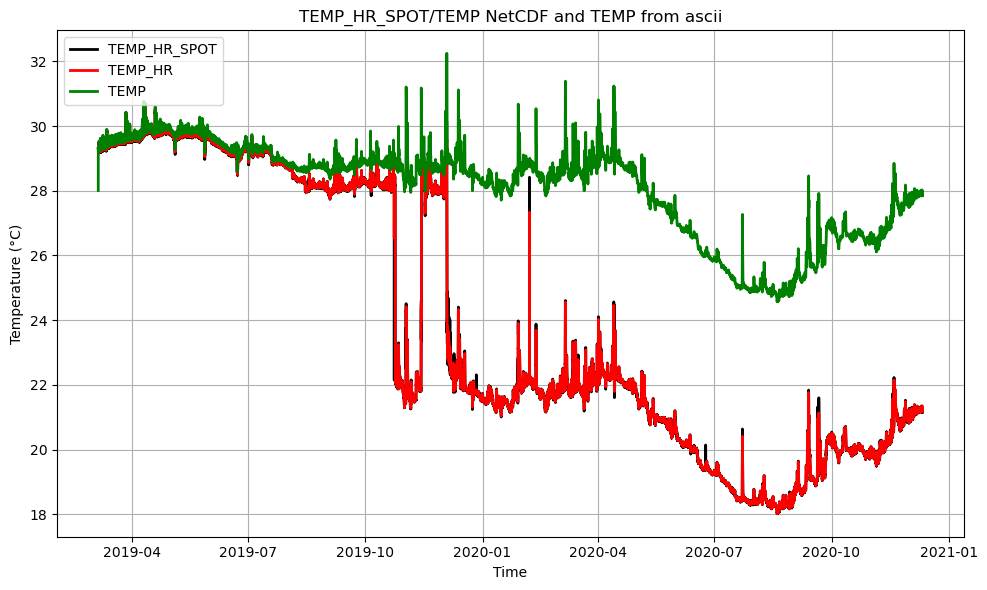

In [8]:
# Convert to pandas Series for plotting
temp_hr_spot_df = temp_hr_spot_series.to_dataframe(name='TEMP_HR_SPOT').dropna()
temp_df = temp_series.to_dataframe(name='TEMP').dropna()
temp_hr_df = temp_hr_series.to_dataframe(name='TEMP_HR').dropna()

plt.figure(figsize=(10, 6))

# Plot TEMP_HR_SPOT (black)
plt.plot(temp_hr_spot_df.index, temp_hr_spot_df['TEMP_HR_SPOT'], color='black', label='TEMP_HR_SPOT', linewidth=2)

# Plot TEMP_HR (red)
plt.plot(temp_hr_df.index, temp_hr_df['TEMP_HR'], color='red', label='TEMP_HR', linewidth=2)

# Plot TEMP (green)
plt.plot(temp_df.index, temp_df['TEMP'], color='green', label='TEMP', linewidth=2)

# Style the plot
plt.title('TEMP_HR_SPOT/TEMP NetCDF and TEMP from ascii')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

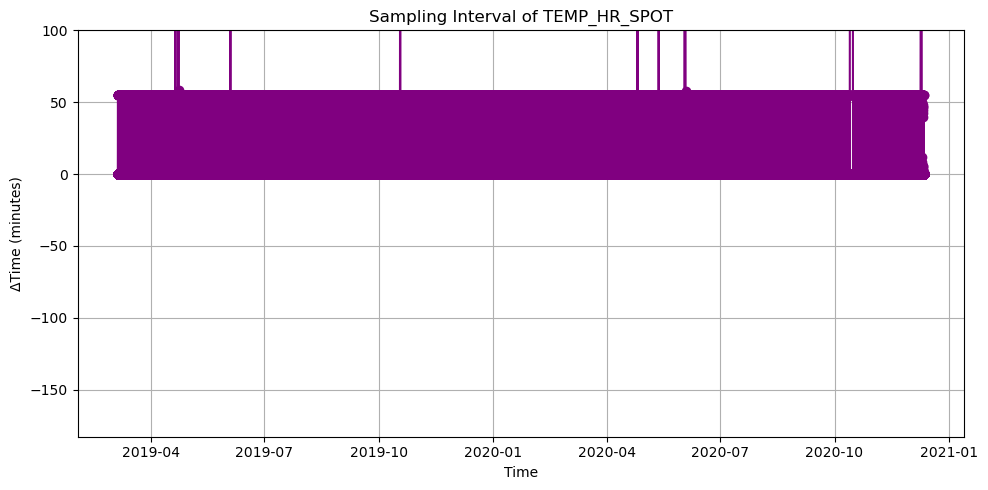

In [9]:
# Step 1: Get time index from TEMP_HR_SPOT
time_index = temp_hr_spot_df.index

# Step 2: Compute differences between times
time_deltas = time_index.to_series().diff().dropna()

# Step 3: Convert to minutes (or use .total_seconds(), .days, etc.)
delta_minutes = time_deltas.dt.total_seconds() / 60

# Step 4: Plot
plt.figure(figsize=(10, 5))
plt.plot(delta_minutes.index, delta_minutes.values, marker='o', linestyle='-', color='purple')
plt.ylim(top=100)
# Style
plt.title('Sampling Interval of TEMP_HR_SPOT')
plt.xlabel('Time')
plt.ylabel('ΔTime (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
delta_minutes.mean()*60

12.128042048235415